<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Autentificación-de-la-API-de-Spotipy" data-toc-modified-id="Autentificación-de-la-API-de-Spotipy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Autentificación de la API de Spotipy</a></span></li><li><span><a href="#Llamada-a-la-API" data-toc-modified-id="Llamada-a-la-API-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Llamada a la API</a></span><ul class="toc-item"><li><span><a href="#Llamada-usando-el-URI-de-la-Playlist" data-toc-modified-id="Llamada-usando-el-URI-de-la-Playlist-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Llamada usando el URI de la Playlist</a></span></li><li><span><a href="#Sacamos-la-info-de-la-playlist" data-toc-modified-id="Sacamos-la-info-de-la-playlist-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Sacamos la info de la playlist</a></span></li><li><span><a href="#Sacamos-la-información-de-las-canciones" data-toc-modified-id="Sacamos-la-información-de-las-canciones-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Sacamos la información de las canciones</a></span><ul class="toc-item"><li><span><a href="#Quién-añadió-la-canción" data-toc-modified-id="Quién-añadió-la-canción-2.3.1"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Quién añadió la canción</a></span></li><li><span><a href="#Nombre-de-la-canción" data-toc-modified-id="Nombre-de-la-canción-2.3.2"><span class="toc-item-num">2.3.2&nbsp;&nbsp;</span>Nombre de la canción</a></span></li><li><span><a href="#Popularidad-de-la-canción" data-toc-modified-id="Popularidad-de-la-canción-2.3.3"><span class="toc-item-num">2.3.3&nbsp;&nbsp;</span>Popularidad de la canción</a></span></li><li><span><a href="#Nombre-del-artista" data-toc-modified-id="Nombre-del-artista-2.3.4"><span class="toc-item-num">2.3.4&nbsp;&nbsp;</span>Nombre del artista</a></span></li><li><span><a href="#Es-una-canción-explicita" data-toc-modified-id="Es-una-canción-explicita-2.3.5"><span class="toc-item-num">2.3.5&nbsp;&nbsp;</span>Es una canción explicita</a></span></li><li><span><a href="#Información-sobre-el-album" data-toc-modified-id="Información-sobre-el-album-2.3.6"><span class="toc-item-num">2.3.6&nbsp;&nbsp;</span>Información sobre el album</a></span></li><li><span><a href="#URI-de-la-canción,-es-como-sel-DNI-de-la-canción" data-toc-modified-id="URI-de-la-canción,-es-como-sel-DNI-de-la-canción-2.3.7"><span class="toc-item-num">2.3.7&nbsp;&nbsp;</span>URI de la canción, es como sel DNI de la canción</a></span></li></ul></li></ul></li><li><span><a href="#Sacar-información-de-cada-una-de-las-canciones" data-toc-modified-id="Sacar-información-de-cada-una-de-las-canciones-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sacar información de cada una de las canciones</a></span></li><li><span><a href="#Juntamos-los-dos-dataframes-que-nos-hemos-creado-de-las-canciones-y-las-playlist" data-toc-modified-id="Juntamos-los-dos-dataframes-que-nos-hemos-creado-de-las-canciones-y-las-playlist-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Juntamos los dos dataframes que nos hemos creado de las canciones y las playlist</a></span></li></ul></div>

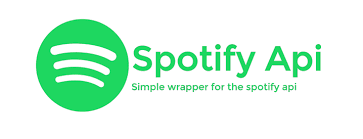

In [1]:
# antes de empezar los instalamos la librería de spotify
#!pip install spotipy

In [1]:
import sys
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import os
from dotenv import load_dotenv
load_dotenv()

True

# Autentificación de la API de Spotipy 

In [2]:
# obtenemos los tokens que hemos guardado en nuestro .env

CLIENT_SECRET=os.getenv("secret")
CLIENT_ID=os.getenv("id")

In [3]:
# nos conectamos con la API usando nuestras credenciales. ESTO ES LEY 😉

credenciales = SpotifyClientCredentials(CLIENT_ID, CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager = credenciales)
                    

[Aquí](https://spotipy.readthedocs.io/en/2.19.0/) os dejamos la documentación. 

# Llamada a la API 

Para hacer las llamadas a la API necesitaremos: 

- URI de la Playlist


- URIs de las canciones

## Llamada usando el URI de la Playlist

De donde sacamos el URI de la Playlist? 

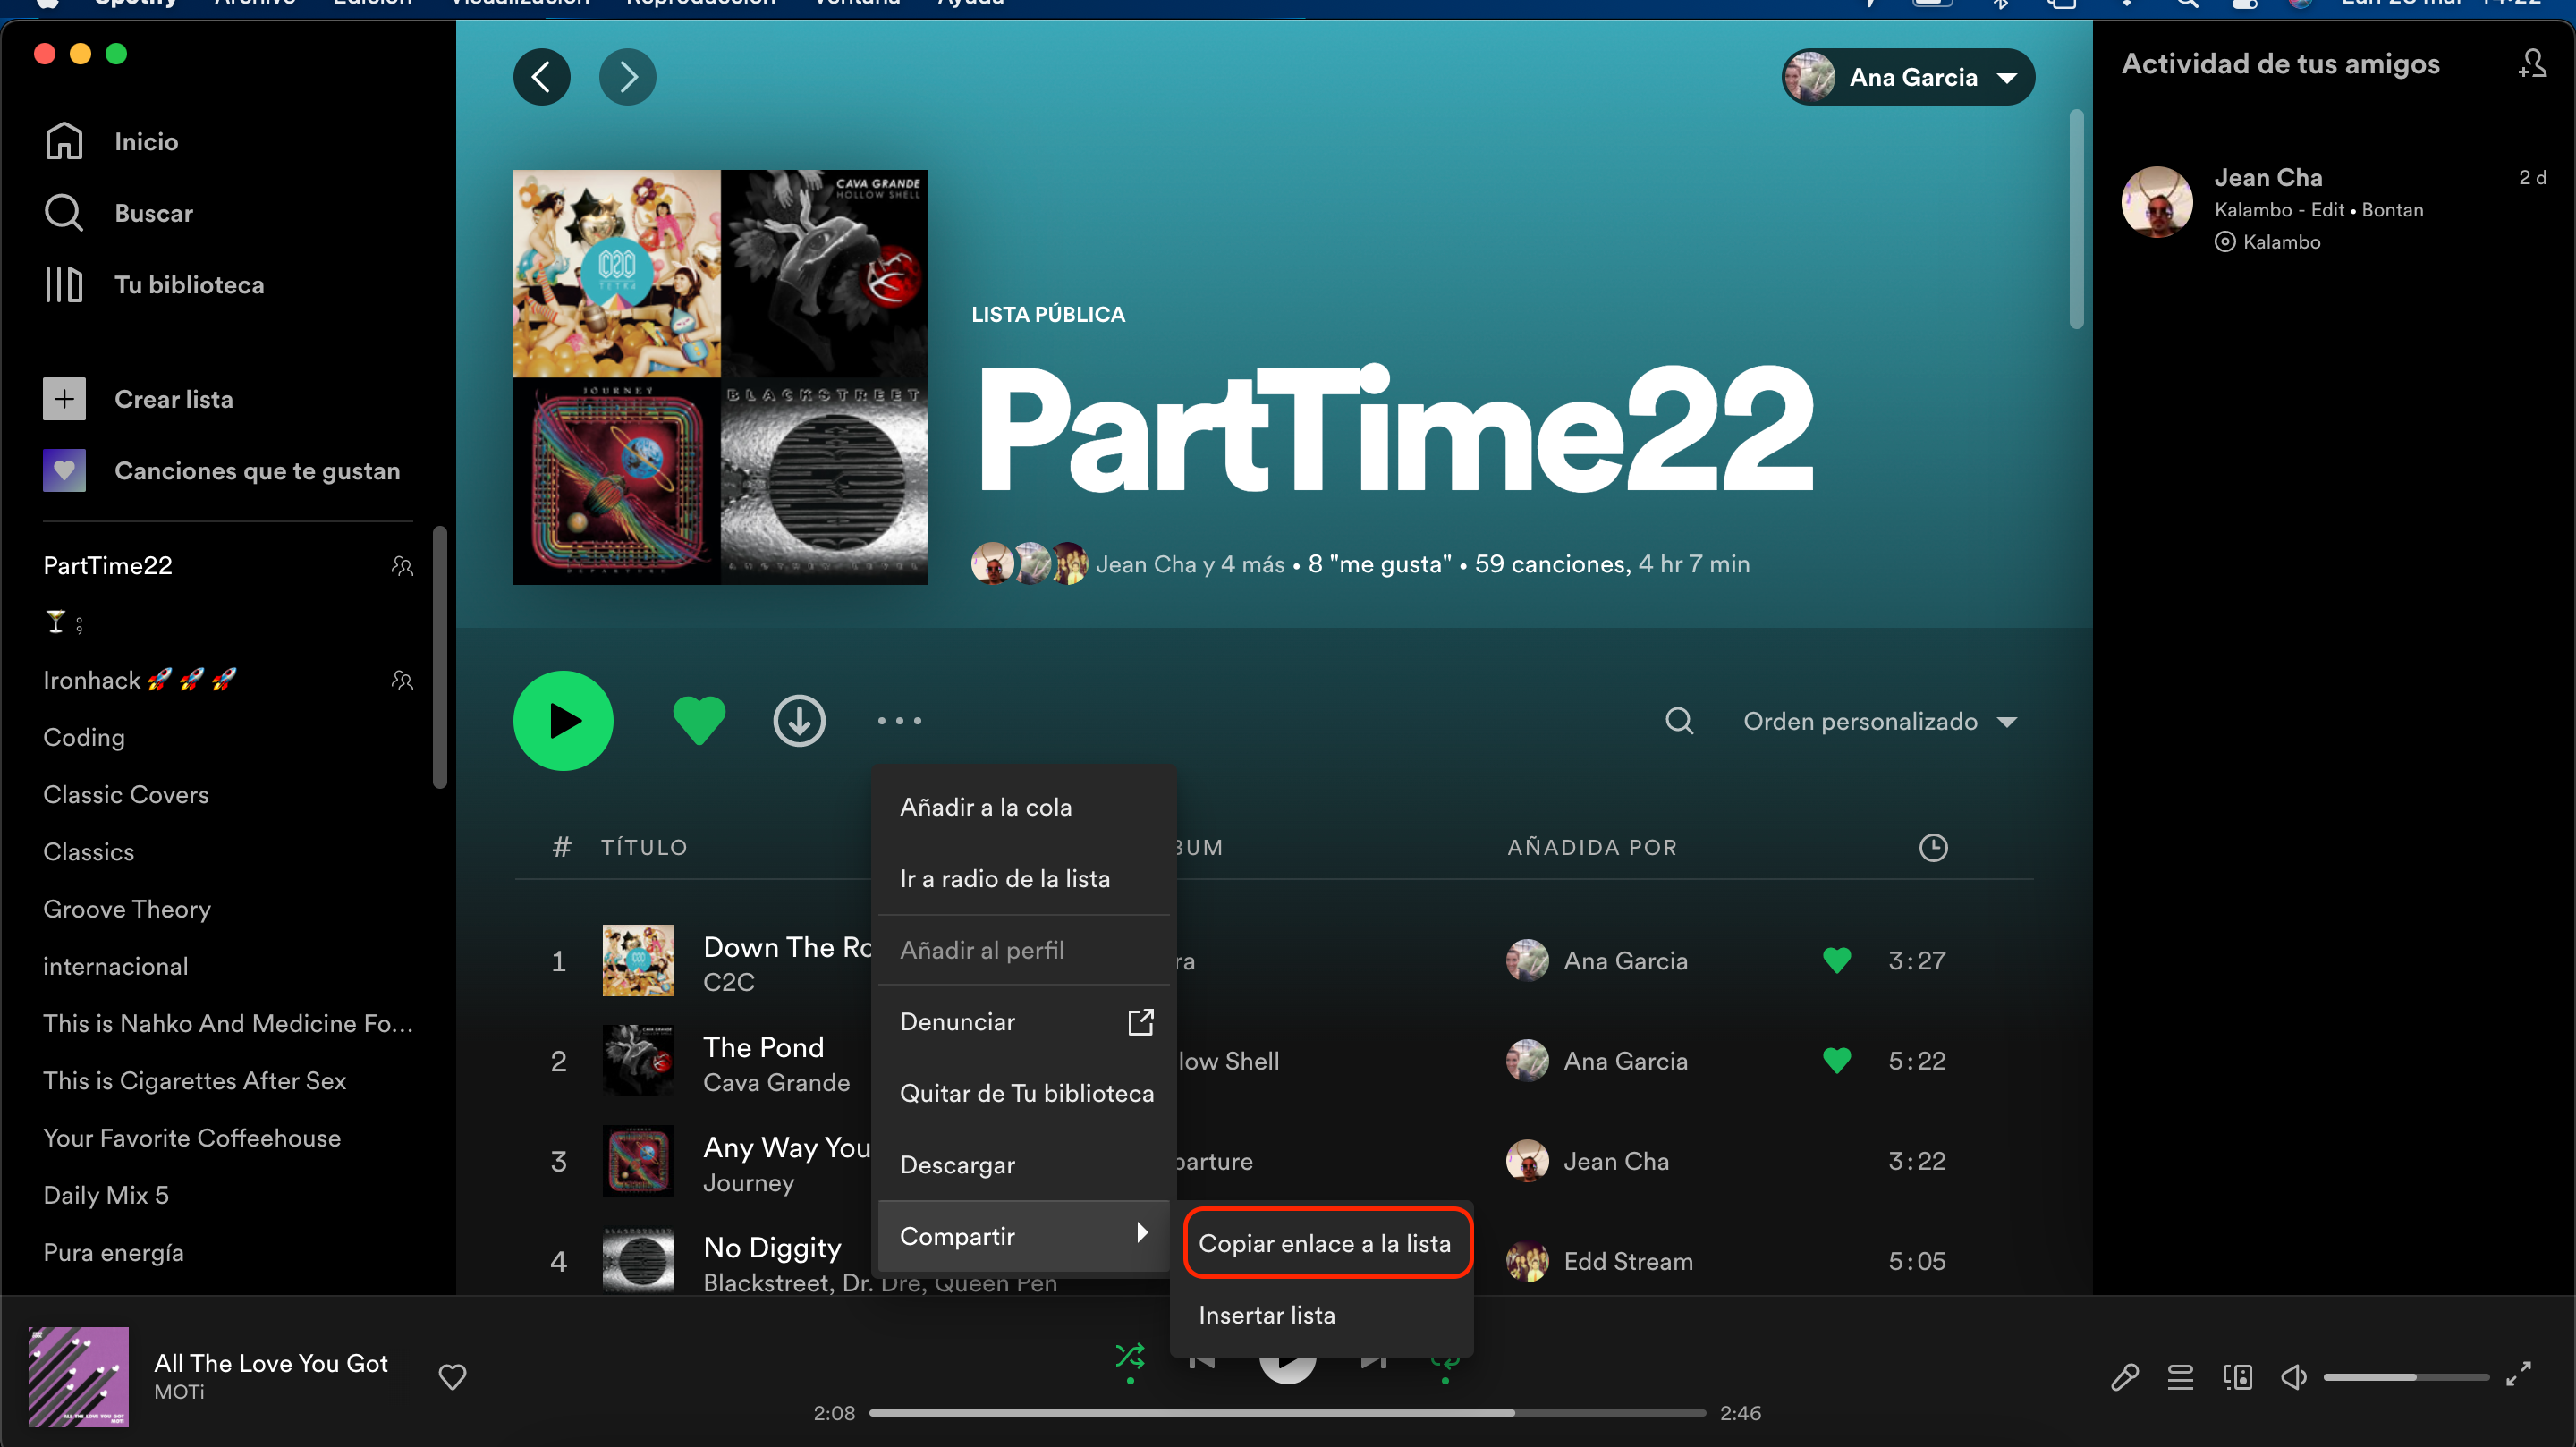

In [4]:
link = 'https://open.spotify.com/playlist/6GS523RZPJ8l4zpA1wBrEa?si=8b08a47cfc214330'

In [5]:
playlist_URI = link.split('/')[-1].split('?')[0]

In [6]:
playlist_URI

'6GS523RZPJ8l4zpA1wBrEa'

## Sacamos la info de la playlist

Para obtener los URIs de las pistas necesitamos obtener todos los tranks de nuestra lista de reproducción. Para ello utilizaremos el método `playlist_tracks`. 

In [7]:
# nos creamos una lista donde almacenaremos los resultados de la llamada a la API. 
all_data = [] 

# hacemos la llamada a la API
all_data.append(sp.playlist_tracks(playlist_URI)["items"])


Veamos que información tenemos: 

In [8]:
# all_data[0][1]

In [9]:
len((all_data[0]))

59

In [10]:
all_data[0]

[{'added_at': '2022-03-26T10:48:33Z',
  'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/1183037273'},
   'href': 'https://api.spotify.com/v1/users/1183037273',
   'id': '1183037273',
   'type': 'user',
   'uri': 'spotify:user:1183037273'},
  'is_local': False,
  'primary_color': None,
  'track': {'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/28INUgyzTTRbvSphrJbgZ2'},
      'href': 'https://api.spotify.com/v1/artists/28INUgyzTTRbvSphrJbgZ2',
      'id': '28INUgyzTTRbvSphrJbgZ2',
      'name': 'C2C',
      'type': 'artist',
      'uri': 'spotify:artist:28INUgyzTTRbvSphrJbgZ2'}],
    'available_markets': ['AD',
     'AG',
     'AL',
     'AM',
     'AO',
     'AR',
     'AT',
     'AU',
     'AZ',
     'BA',
     'BB',
     'BD',
     'BE',
     'BF',
     'BG',
     'BI',
     'BJ',
     'BN',
     'BO',
     'BR',
     'BS',
     'BT',
     'BW',
     'BY',
     'BZ',
     'CD',
     'CG',
     'C

## Sacamos la información de las canciones

In [11]:
all_data[0][58].keys()

dict_keys(['added_at', 'added_by', 'is_local', 'primary_color', 'track', 'video_thumbnail'])

### Quién añadió la canción

In [12]:
all_data[0][58]["added_by"]

{'external_urls': {'spotify': 'https://open.spotify.com/user/1164872058'},
 'href': 'https://api.spotify.com/v1/users/1164872058',
 'id': '1164872058',
 'type': 'user',
 'uri': 'spotify:user:1164872058'}

In [13]:
all_data[0][58]["added_by"]["id"]

'1164872058'

**Información sobre las canciones**

In [14]:
# como es un diccionario muy grande y difícil de entender veamos sus keys para saber que información tengo de cada canción. 

all_data[0][58]['track'].keys()

dict_keys(['album', 'artists', 'available_markets', 'disc_number', 'duration_ms', 'episode', 'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local', 'name', 'popularity', 'preview_url', 'track', 'track_number', 'type', 'uri'])

### Nombre de la canción

In [15]:
all_data[0][58]['track']['name']

"Autumn (L'Automno) Op.8 No.3 Major: Allegro"

### Popularidad de la canción

In [16]:
all_data[0][58]['track']['popularity']

46

### Nombre del artista

In [17]:
all_data[0][58]['track']['artists'][1].keys()

dict_keys(['external_urls', 'href', 'id', 'name', 'type', 'uri'])

In [18]:
all_data[0][58]['track']['artists'][0]['name']

'Baroque Festival Orchestra'

### Es una canción explicita 

In [19]:
all_data[0][58]['track']['explicit']

False

### URI de la canción, es como sel DNI de la canción

In [20]:
all_data[0][58]['track']['uri']

'spotify:track:7d20u6lKFtjLVNW9nhJAsL'

### Información sobre el album

In [21]:
# información sobre el album

all_data[0][58]['track']['album'].keys()

dict_keys(['album_type', 'artists', 'available_markets', 'external_urls', 'href', 'id', 'images', 'name', 'release_date', 'release_date_precision', 'total_tracks', 'type', 'uri'])

In [22]:
# en que año se publicó la canción

all_data[0][58]['track']['album']['release_date']

'1994-07-01'

**Lo hemos hecho para una canción, es el momento de hacerlo para todas!**

In [23]:
basic_info = {'song':[],  'artist': [], 'date': [],  'explicit': [],'uri':[], 'popularity': [], 'ironhacker': []}

for z in range(59):
    try:
        basic_info['uri'].append(all_data[0][z]['track']['uri'])
        basic_info['song'].append(all_data[0][z]['track']['name'])
        basic_info['artist'].append(all_data[0][z]['track']['artists'][0]['name'])
        basic_info['popularity'].append(all_data[0][z]['track']['popularity'])
        basic_info['date'].append(all_data[0][z]['track']['album']['release_date'])
        basic_info['explicit'].append(all_data[0][z]['track']['explicit'])
        basic_info['ironhacker'].append(all_data[0][z]["added_by"]['id'])



    except:
        pass

In [24]:
len(basic_info)

7

In [25]:
df_basic_info = pd.DataFrame(basic_info)

In [26]:
df_basic_info.head()

,song,artist,date,explicit,uri,popularity,ironhacker
0,Down The Road,C2C,2012-01-01,False,spotify:track:1SayqEg8HKK2IeIEWjdYxY,57,1183037273
1,The Pond,Cava Grande,2021-01-29,False,spotify:track:0IyuvVFF4mXGi9viEqaEsI,37,1183037273
2,Any Way You Want It,Journey,1980,False,spotify:track:71SvEDmsOwIWw1IozsZoMA,76,1182774545
3,No Diggity,Blackstreet,1996-09-09,False,spotify:track:6MdqqkQ8sSC0WB4i8PyRuQ,81,11142035356
4,Lost on You,LP,2017-05-05,False,spotify:track:2LIh4uzqq9cXMPzzmcToHl,79,bar63


In [27]:
df_basic_info.to_csv("basic_info.csv")

# Sacar información de cada una de las canciones

Para hacer esto necesitamos los URI's de las canciones

In [28]:
# hacemos una lista con los URIs de las canciones
uris = list(df_basic_info.uri.unique())

**Para extraer la información de cada canción necesitamos usar el metodo `audio_features`**

In [29]:
features = []
for cancion in uris:
    features.append(sp.audio_features(cancion))

In [30]:
len(features)

59

In [31]:
# veamos el contenido 
features[0]

[{'danceability': 0.72,
  'energy': 0.595,
  'key': 2,
  'loudness': -6.109,
  'mode': 0,
  'speechiness': 0.0976,
  'acousticness': 0.0672,
  'instrumentalness': 4.73e-05,
  'liveness': 0.0775,
  'valence': 0.486,
  'tempo': 111.0,
  'type': 'audio_features',
  'id': '1SayqEg8HKK2IeIEWjdYxY',
  'uri': 'spotify:track:1SayqEg8HKK2IeIEWjdYxY',
  'track_href': 'https://api.spotify.com/v1/tracks/1SayqEg8HKK2IeIEWjdYxY',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1SayqEg8HKK2IeIEWjdYxY',
  'duration_ms': 207187,
  'time_signature': 4}]

In [32]:
df = pd.DataFrame(features)
df.head()

,0
0,"{'danceability': 0.72, 'energy': 0.595, 'key':..."
1,"{'danceability': 0.714, 'energy': 0.618, 'key'..."
2,"{'danceability': 0.529, 'energy': 0.932, 'key'..."
3,"{'danceability': 0.867, 'energy': 0.646, 'key'..."
4,"{'danceability': 0.433, 'energy': 0.724, 'key'..."


In [33]:
df_features = df[0].apply(pd.Series)
df_features.head(1)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.72,0.595,2,-6.109,0,0.0976,0.0672,0.000047,0.0775,0.486,111.0,audio_features,1SayqEg8HKK2IeIEWjdYxY,spotify:track:1SayqEg8HKK2IeIEWjdYxY,https://api.spotify.com/v1/tracks/1SayqEg8HKK2...,https://api.spotify.com/v1/audio-analysis/1Say...,207187,4


# Juntamos los dos dataframes que nos hemos creado de las canciones y las playlist

In [34]:
final = pd.merge(df_basic_info, df_features,  on='uri')
final.head(1)

,song,artist,date,explicit,uri,popularity,ironhacker,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,Down The Road,C2C,2012-01-01,False,spotify:track:1SayqEg8HKK2IeIEWjdYxY,57,1183037273,0.72,0.595,2,...,0.000047,0.0775,0.486,111.0,audio_features,1SayqEg8HKK2IeIEWjdYxY,https://api.spotify.com/v1/tracks/1SayqEg8HKK2...,https://api.spotify.com/v1/audio-analysis/1Say...,207187,4


In [35]:
final.head()

,song,artist,date,explicit,uri,popularity,ironhacker,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,type,id,track_href,analysis_url,duration_ms,time_signature
0,Down The Road,C2C,2012-01-01,False,spotify:track:1SayqEg8HKK2IeIEWjdYxY,57,1183037273,0.720,0.595,2,...,0.000047,0.0775,0.486,111.000,audio_features,1SayqEg8HKK2IeIEWjdYxY,https://api.spotify.com/v1/tracks/1SayqEg8HKK2...,https://api.spotify.com/v1/audio-analysis/1Say...,207187,4
1,The Pond,Cava Grande,2021-01-29,False,spotify:track:0IyuvVFF4mXGi9viEqaEsI,37,1183037273,0.714,0.618,9,...,0.865000,0.1350,0.549,121.984,audio_features,0IyuvVFF4mXGi9viEqaEsI,https://api.spotify.com/v1/tracks/0IyuvVFF4mXG...,https://api.spotify.com/v1/audio-analysis/0Iyu...,321639,4
2,Any Way You Want It,Journey,1980,False,spotify:track:71SvEDmsOwIWw1IozsZoMA,76,1182774545,0.529,0.932,7,...,0.001090,0.1360,0.571,138.158,audio_features,71SvEDmsOwIWw1IozsZoMA,https://api.spotify.com/v1/tracks/71SvEDmsOwIW...,https://api.spotify.com/v1/audio-analysis/71Sv...,201693,4
3,No Diggity,Blackstreet,1996-09-09,False,spotify:track:6MdqqkQ8sSC0WB4i8PyRuQ,81,11142035356,0.867,0.646,1,...,0.000000,0.2790,0.670,88.634,audio_features,6MdqqkQ8sSC0WB4i8PyRuQ,https://api.spotify.com/v1/tracks/6MdqqkQ8sSC0...,https://api.spotify.com/v1/audio-analysis/6Mdq...,304600,4
4,Lost on You,LP,2017-05-05,False,spotify:track:2LIh4uzqq9cXMPzzmcToHl,79,bar63,0.433,0.724,5,...,0.000000,0.0918,0.689,174.006,audio_features,2LIh4uzqq9cXMPzzmcToHl,https://api.spotify.com/v1/tracks/2LIh4uzqq9cX...,https://api.spotify.com/v1/audio-analysis/2LIh...,268105,4


In [36]:
final.shape

(59, 24)

In [37]:
final.to_csv('final_final.csv')